
# Практическая работа 4-2: Линейная регрессия 2

Name: Макарова Виктория

Email:makarova_vs@mgpu.ru


## ##  Анализ набора кредитных данных

Вспомните набор данных «Кредит», рассмотренный на занятии и доступный [здесь](http://www-bcf.usc.edu/~gareth/ISL/data.html).
Этот набор данных состоит из информации о кредитных картах 400 человек.

Сначала импортируйте данные и преобразуйте доход в тысячи.

In [ ]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm     #Last lecture: used statsmodels.formula.api.ols() for OLS
from sklearn import linear_model         #Last lecture: used sklearn.linear_model.LinearRegression() for OLS

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from google.colab import files

uploaded = files.upload()
creditt = pd.read_csv('Credit.csv',index_col=0) #load data

creditt["Income"] = creditt["Income"].map(lambda x: 1000*x)
creditt

Saving Credit.csv to Credit (1).csv


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14891.0,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106025.0,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104593.0,7075,514,4,71,11,Male,No,No,Asian,580
4,148924.0,9504,681,3,36,11,Female,No,No,Asian,964
5,55882.0,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
396,12096.0,4100,307,3,32,13,Male,No,Yes,Caucasian,560
397,13364.0,3838,296,5,65,17,Male,No,No,African American,480
398,57872.0,4171,321,5,67,12,Female,No,Yes,Caucasian,138
399,37728.0,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [ ]:
creditt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


In [ ]:
creditt.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45218.885000,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35244.273165,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10354.000000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21007.250000,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33115.500000,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57470.750000,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186634.000000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [ ]:
new_credit= creditt[['Income','Limit','Rating', 'Cards','Age','Education', 'Balance']].copy()

In [ ]:
new_credit.corr()

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


+ Лимит и рейтинг тесно связаны ($99,7\%$)
+ Доход сильно коррелирует с лимитом ($79\%$) и рейтингом ($79\%$)
+ Баланс коррелирует с Лимитом ($86\%$) и Рейтингом ($86\%$)

             Income     Limit    Rating     Cards       Age  Education  \
Income     1.000000  0.792088  0.791378 -0.018273  0.175338  -0.027692   
Limit      0.792088  1.000000  0.996880  0.010231  0.100888  -0.023549   
Rating     0.791378  0.996880  1.000000  0.053239  0.103165  -0.030136   
Cards     -0.018273  0.010231  0.053239  1.000000  0.042948  -0.051084   
Age        0.175338  0.100888  0.103165  0.042948  1.000000   0.003619   
Education -0.027692 -0.023549 -0.030136 -0.051084  0.003619   1.000000   
Balance    0.463656  0.861697  0.863625  0.086456  0.001835  -0.008062   

            Balance  
Income     0.463656  
Limit      0.861697  
Rating     0.863625  
Cards      0.086456  
Age        0.001835  
Education -0.008062  
Balance    1.000000  


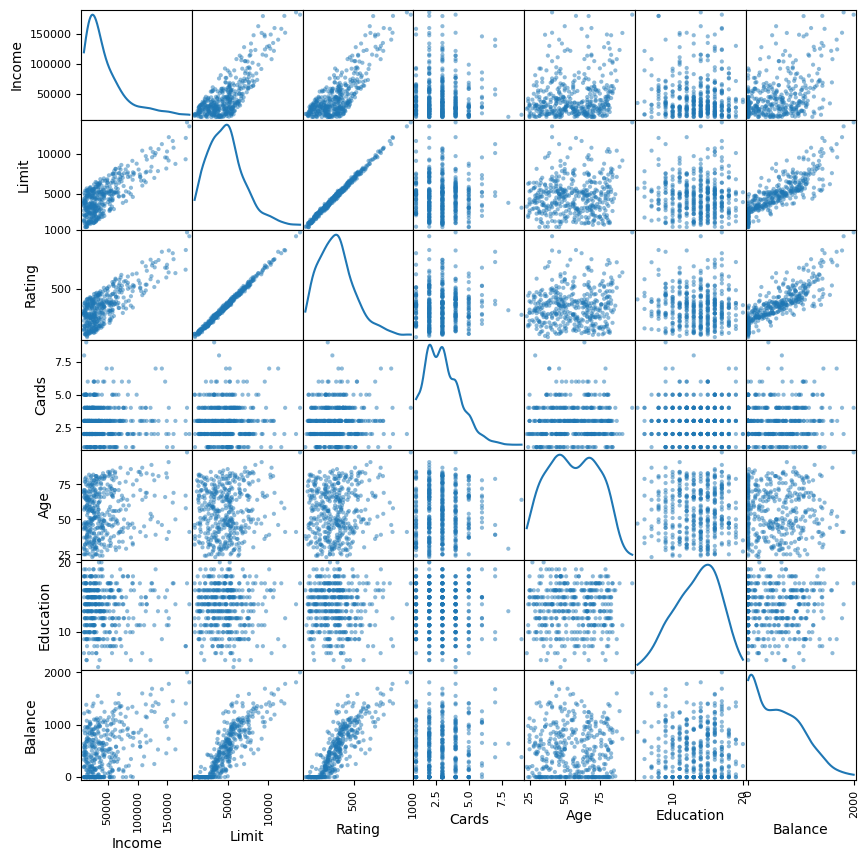

In [ ]:
print(new_credit.corr())
pd.plotting.scatter_matrix(new_credit, figsize=(10, 10), diagonal='kde')
plt.show()

## Задание 1. Первая регрессионная модель

**Упражнение:** Лимит средств по рейтингу:


$$
\text{Limit} = \beta_0 + \beta_1 \text{Rating}.
$$

Поскольку кредитные рейтинги в основном используются банками для определения кредитных лимитов, ожидаем, что рейтинг будет в прямой зависимости для лимита, поэтому эта регрессия должна быть очень хорошей.

Используйте функцию `ols` из библиотеки Python `statsmodels`. Каково значение $R^2$? Что такое $H_0$ и $H_A$ для соответствующей проверки гипотезы и каково значение $p$?


 Пусть нулевая гипотеза: переменная Rating не имеет влияния на переменную Limit

Тогда альтернативная гипотеза: переменная Rating влияет на переменную Limit

In [ ]:
credit_rating_ols = sm.ols(formula="Limit ~ Rating", data=creditt).fit()
credit_rating_ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.348e+04
Date:                Sun, 07 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:56:13   Log-Likelihood:                -2649.1
No. Observations:                 400   AIC:                             5302.
Df Residuals:                     398   BIC:                             5310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -542.9282     22.850    -23.760      0.000    -587.851    -498.006
Rating        14.8716      0.059    251.949      0.000      14.756      14.988
==============================================================================
Omnibus:                        6.887   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                4.980
Skew:                          -0.145   Prob(JB):                       0.0829
Kurtosis:                       2.537   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Значение $R^2$= 99% модель хорошо соответствует данным. Значение p мало.
Значение p = 0.000, поэтому отвергаем нулевую гипотезу.

Кредитный рейтинг Rating имеет статистически значимое влияние на уровень кредитного лимита Limit.

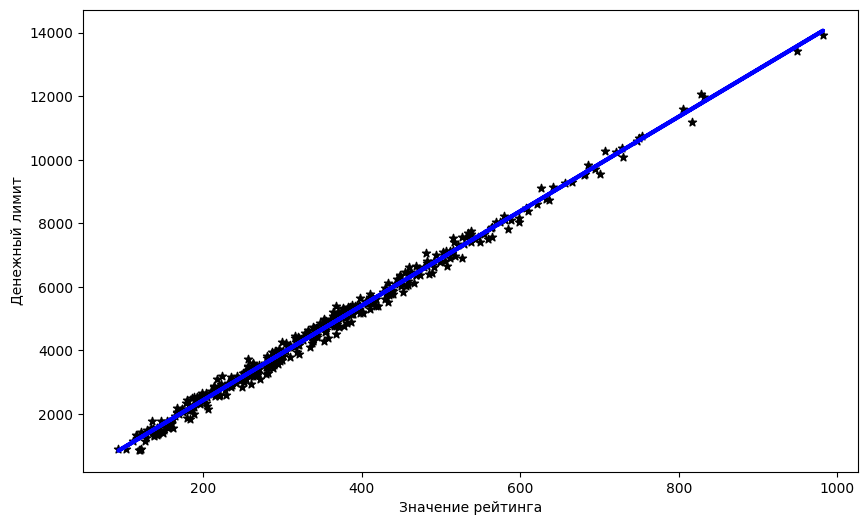

In [ ]:
plt.scatter(x=creditt['Rating'],y=creditt['Limit'],c='k',marker='*',label='TV')
plt.plot(creditt['Rating'],credit_rating_ols.predict(),color='blue',linewidth=3)

plt.xlabel('Значение рейтинга')
plt.ylabel('Денежный лимит')
plt.show()

**Ваш ответ:** Значения очень четко отражены на линии тренда


## Задание 2: Прогнозирование лимита без рейтинга

Поскольку `Рейтинг` и `Лимит` — это практически одна и та же переменная, исключим `Рейтинг` и просто попробуем спрогнозировать `Лимит` на основе вещественнозначных переменных (некатегориальных переменных): Доход, Карты, Возраст, Образование, Баланс.

**Упражнение.** Разработайте модель множественной линейной регрессии для прогнозирования рейтинга. Интерпретируйте результаты.

А пока просто сосредоточьтесь на переменных с численными значениями (доход, карты, возраст, образование, баланс).

В первом приближении не использовать категориальные переменные (Пол, Студент, Семейное положение, Этническая принадлежность).



In [ ]:
cr_all_ols = sm.ols(formula="Rating ~ Income + Cards + Age + Education + Balance", data=creditt).fit()
cr_all_ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1255.
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          1.68e-239
Time:                        17:57:34   Log-Likelihood:                -2017.9
No. Observations:                 400   AIC:                             4048.
Df Residuals:                     394   BIC:                             4072.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    143.6089     11.377     12.622      0.000     121.241     165.977
Income         0.0022   6.21e-05     34.987      0.000       0.002       0.002
Cards          0.7105      1.394      0.510      0.611      -2.030       3.451
Age            0.1347      0.112      1.200      0.231      -0.086       0.355
Education     -0.5475      0.607     -0.902      0.368      -1.741       0.646
Balance        0.2132      0.005     45.367      0.000       0.204       0.222
==============================================================================
Omnibus:                       64.518   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.640
Skew:                          -1.179   Prob(JB):                     4.64e-21
Kurtosis:                       3.247   Cond. No.                     3.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Какие независимые переменные являются хорошими/плохими предикторами? Какая модель в целом является лучшей?

**Ваш ответ:**
Модель хорошо соответствует данным, что подтверждает значение $R^2$= 94%.
Хорошими предикторами являются независимые переменные Income и Balance, так как значение p < 0.005. Плохими предикторами выступают Cards, Education, Age значение p > 0.005.



## Задание 3. Включение категориальных переменных в модель регрессии

Рассмотреть двоичные категориальные переменные, которые были ранее сопоставлены с целочисленными значениями 0, 1 в в `лекции 4.2`.

In [ ]:
creditt["Gender_num"] = creditt["Gender"].map({' Male':0, 'Female':1})
creditt["Student_num"] = creditt["Student"].map({'Yes':1, 'No':0})
creditt["Married_num"] = creditt["Married"].map({'Yes':1, 'No':0})

Можете ли улучшить модель, которая разработана в задании `2`, включив в нее одну или несколько из этих переменных?


In [ ]:
credit_model = sm.ols(formula="Rating ~  Gender_num +Student_num + Education + Balance + Age + Cards + Income", data=creditt).fit()
credit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     2130.
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          1.80e-307
Time:                        18:43:27   Log-Likelihood:                -1850.8
No. Observations:                 400   AIC:                             3718.
Df Residuals:                     392   BIC:                             3750.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     141.1272      7.635     18.485      0.000     126.117     156.137
Gender_num      2.9166      2.505      1.164      0.245      -2.008       7.842
Student_num   -98.7439      4.365    -22.623      0.000    -107.325     -90.163
Education       0.1055      0.402      0.263      0.793      -0.685       0.896
Balance         0.2340      0.003     72.267      0.000       0.228       0.240
Age             0.1236      0.074      1.669      0.096      -0.022       0.269
Cards          -0.4014      0.922     -0.435      0.664      -2.214       1.411
Income          0.0021   4.13e-05     50.034      0.000       0.002       0.002
==============================================================================
Omnibus:                       52.367   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.458
Skew:                          -0.959   Prob(JB):                     8.27e-16
Kurtosis:                       3.699   Cond. No.                     3.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Ваш ответ:** При включении в модель категориальных данных (Married_num, Student_num) коэффициент детерминации вырос на 3% $R^2 = 97.4\%$ изменчивости данных учитывается моделью.